What is backpropagation?\
Ans: backpropagation is a method of learning that uses a gradient descent algorithm to find the optimal weights of a neural network.

What is forward propagation?\
Ans: forward propagation is the process of passing an input through a neural network to get the output.

What is gradient descent?\
Ans: gradient descent is an algorithm that uses a gradient to find the optimal weights of a neural network.

What is activation function?\
Ans: activation function is a function that takes an input and returns an output.

Why we need activation function?\
Ans: activation function is used to make sure that the output is between 0 and 1.

Why we will sigmoid function?\
ans: The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.


In [37]:
# Neural Network from scratch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [38]:
# Load dataset 0 mnist
from matplotlib import image
image_path = 'trainingSet/0'

In [39]:
#Show how many images are in the folder
print(len(os.listdir(image_path)))

4132


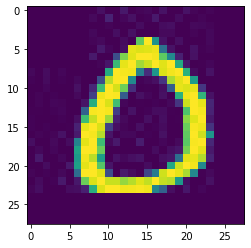

In [40]:
#show one image
image_file = os.path.join(image_path, os.listdir(image_path)[0])
img = image.imread(image_file)
plt.imshow(img)

In [47]:
# Image binarization
def binarize(img):
    img = img.astype(np.float32)
    img = np.where(img < 0.5, 0, 1)
    return img
    

In [48]:
#Load the 1st image matrix
image_file = os.path.join(image_path, os.listdir(image_path)[0])
img = image.imread(image_file)
img = binarize(img)
img = img.reshape(1,784)
print(img.shape)




(1, 784)


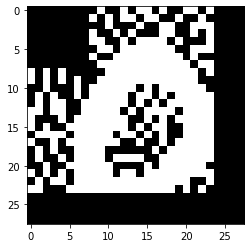

In [49]:
# Show the matrix
plt.imshow(img.reshape(28,28), cmap='gray')
plt.show()

In [50]:
#show the binary matrix using 0 and 1
print(img)

[[0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
  0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
  1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0
  1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
  1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
  0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1
  0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0
  1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1
  1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
  1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 

### Define the weights and bias
##### Here 1 is the number of input neurons and 2 is the number of output neurons.
##### The weights are randomly initialized between -1 and 1.
##### 784 is the number of pixels in the image.

In [53]:

weights = np.random.randn(1, 784)
bias = np.random.randn()


In [54]:
# Define the activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))
    

In [55]:
# Define the derivative of the activation function
def sigmoid_derivative(x):
    return x*(1-x)

In [56]:
# Define the forward propagation
def forward_propagation(x, weights, bias):
    return sigmoid(np.dot(x, weights) + bias)
    

In [57]:
# Define the cost function
def cost_function(x, y, weights, bias):
    return -(y*np.log(forward_propagation(x, weights, bias)) + (1-y)*np.log(1-forward_propagation(x, weights, bias)))

In [58]:
# Perceptron learning rule
def perceptron_learning_rule(x, y, weights, bias, learning_rate):
    # Forward propagation
    prediction = forward_propagation(x, weights, bias)
    # Backpropagation
    weights += learning_rate * np.dot(x.T, (y - prediction))
    bias += learning_rate * (y - prediction)
    return weights, bias
    

In [59]:
# Define the training function
def train_perceptron(x, y, weights, bias, learning_rate, epochs):
    # Initialize the cost array
    cost = []
    # Loop over the number of epochs
    for i in range(epochs):
        # Perceptron learning rule
        weights, bias = perceptron_learning_rule(x, y, weights, bias, learning_rate)
        # Append the cost to the cost array
        cost.append(cost_function(x, y, weights, bias))
    return weights, bias, cost

In [60]:
# Define the predict function
def predict(x, weights, bias):
    return np.where(forward_propagation(x, weights, bias) >= 0.5, 1, 0)
